In [1]:
!pip install -U spacy
!python -m spacy download en_core_web_md
!pip install wordcloud

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import os
os.chdir("C:\\Users\\Venki\\Desktop\\data science\\All data")

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import nltk
from matplotlib.pyplot import imread
%matplotlib inline
nltk.download('stopwords')
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Venki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Elon Musk's Tweets

In [5]:
e=pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [6]:
e

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
e.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [8]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [9]:
e.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
e

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Data Cleaning

In [11]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [12]:
def clean_text(text):
    '''Make text lowercase , remove texts in squared brackects , remove punctuation and remove words containg numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\w*\d\w*','', text)
    text = re.sub("[0-9" "]+","", text)
    text = re.sub('[''""_]','', text)
    return text

In [13]:
clean = lambda x: clean_text(x)

In [14]:
e['Text'] =e.Text.apply(clean)

In [44]:
e

,Text
0,i’m alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make sure read ur terms amp condition...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [47]:
text =' '.join(e['Text'])
text

'i’m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest  geoffkeighley unrealengine it’s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won’t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission … ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficu

In [48]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'i’m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest  geoffkeighley unrealengine it’s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won’t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission … ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficu

In [49]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['i', '’', 'm', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining']


In [50]:
len(text_tokens)

14218

In [57]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Venki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Venki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even']


In [59]:
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'haha', 'thank', 'flcnhvi']


In [62]:
freq= pd.Series(' '.join(e['Text']).split()).value_counts()[:50]
freq

spacex             237
amp                216
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 85
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
…                   57
haha                55
nasaspaceflight     55
it’s                54
good                51
launch              48
sure                43
yeah                41
much                40
cleantechnica       40
would               39
first               39
one                 38
like                37
kristennetten       35
true                35
probably            35
also                33
rationaletienne     33
new                 32
make                32
marcushousegame     31
idaacarmack         31
dragon              31
people              31
nasa                30
need                30
maybe               30
spacestation        30
engineersfeed       30
production          29
starship   

In [63]:
stop= stopwords.words('english')
e['Text'] = e['Text'].apply(lambda x:  " ".join(x for x in x.split() if x not in stop))

In [64]:
freqsw = pd.Series(' '.join(e['Text']).split()).value_counts()[:30]
freqsw

spacex             237
amp                216
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 85
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
…                   57
haha                55
nasaspaceflight     55
it’s                54
good                51
launch              48
sure                43
yeah                41
much                40
cleantechnica       40
would               39
first               39
one                 38
like                37
kristennetten       35
true                35
probably            35
also                33
dtype: int64

In [65]:
e['Text']

0                                               i’m alien
1       idaacarmack ray tracing cyberpunk hdr nextleve...
2                        joerogan spotify great interview
3                                     doge underestimated
4       teslacn congratulations tesla china amazing ex...
                              ...                        
1994    flcnhvy true sounds surreal negative propagand...
1995    ppathole make sure read ur terms amp condition...
1996                    teslagong ppathole samwise gamgee
1997                           ppathole altho dumb dumber
1998                               progress update august
Name: Text, Length: 1999, dtype: object

# Feature Extraction

In [66]:
vectorizer = CountVectorizer(min_df=1,max_df=0.9)
x = vectorizer.fit_transform(e["Text"])

WF = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences' :np.asarray(x.sum(axis=0)).ravel().tolist()})
WF['frequency'] = WF['occurrences']/np.sum(WF['occurrences'])

In [67]:
WF

,term,occurrences,frequency
0,aber,1,0.000074
1,able,6,0.000446
2,abo,1,0.000074
3,aboard,1,0.000074
4,abort,3,0.000223
...,...,...,...
4477,zshauladventure,1,0.000074
4478,zubinanary,1,0.000074
4479,zwiebelbach,1,0.000074
4480,zzcool,1,0.000074


# bigrams and trigrams

In [77]:
def get_top_n2_words(corpus, n=None):
    vec1=CountVectorizer(ngram_range=(2,2), 
          max_features=2000).fit(corpus)               
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in
               vec1.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1],
            reverse=True)
    return words_freq[:n]

In [78]:
top2_words=get_top_n2_words(e['Text'],n=200)
top2_df=pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


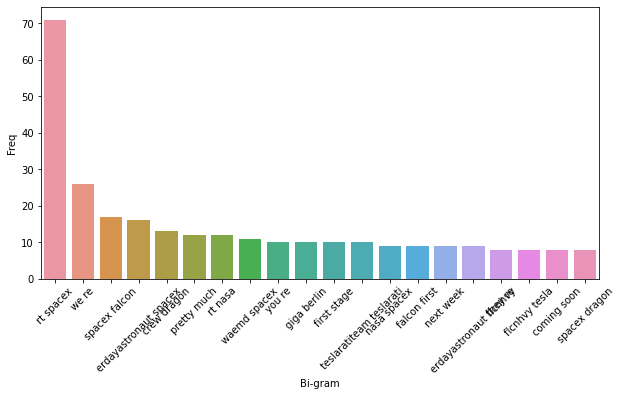

In [79]:
top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"]);

In [80]:
def get_top_n3_words(corpus, n=None):
    vec1=CountVectorizer(ngram_range=(3,3),
          max_features=2000).fit(corpus)               
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in
               vec1.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1],
            reverse=True)
    return words_freq[:n]

In [81]:
top3_words=get_top_n3_words(e['Text'],n=200) 
top3_df=pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram","Freq"]
top3_df.head()

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


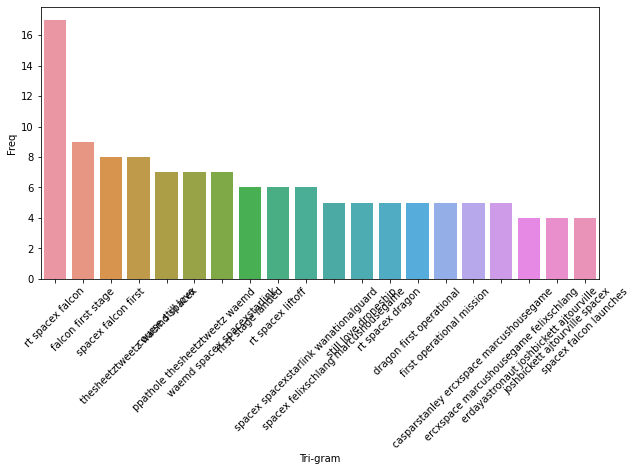

In [82]:
top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot1=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot1.set_xticklabels(rotation=45,labels=top20_trigram["Tri-gram"]);

# TFidf vectorizer

In [75]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)
doc_vec=vectorizer.fit_transform(e['Text'])
names_features=vectorizer.get_feature_names()
dense=doc_vec.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=names_features)

In [76]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Wordcloud

In [73]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

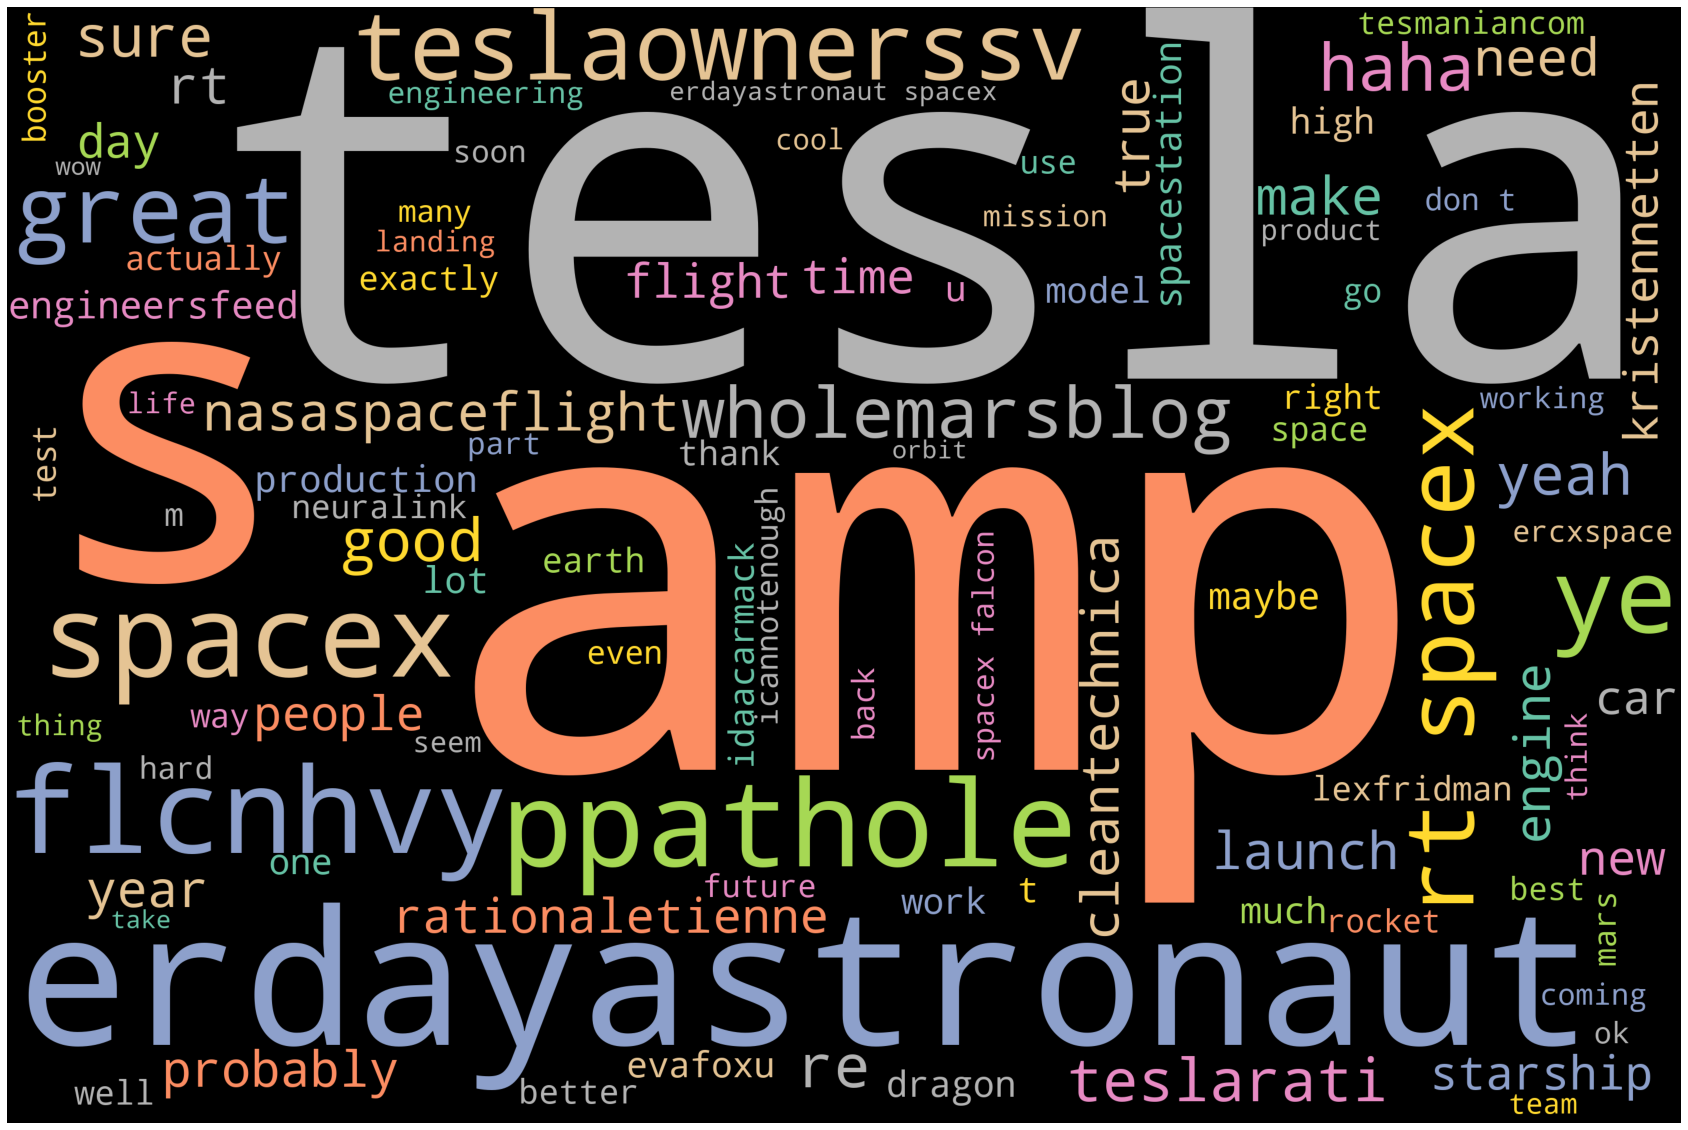

In [74]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

# Emotion Mining

In [84]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [85]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [87]:
emsa=e.copy()

In [88]:
emsa

,Text
0,i’m alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make sure read ur terms amp condition...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [90]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [92]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [95]:
calculate_sentiment(text='amazing')

4

In [94]:
calculate_sentiment(text='bad')

-3

In [96]:
emsa['Text']=emsa['Text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
emsa.head()

,Text
0,alien
1,idaacarmack tracing cyberpunk nextlevel tried
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...


In [97]:
emsa['sentiment_value'] = emsa['Text'].apply(calculate_sentiment)
emsa

,Text,sentiment_value
0,alien,0
1,idaacarmack tracing cyberpunk nextlevel tried,0
2,joerogan spotify great interview,3
3,doge underestimated,-1
4,teslacn congratulations tesla china amazing ex...,6
...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-3
1995,ppathole make sure read terms conditions click...,1
1996,teslagong ppathole samwise gamgee,0
1997,ppathole altho dumb dumber,-3


In [98]:
emsa['word_count'] = emsa['Text'].str.split().apply(len)
emsa['word_count'].head(10)

0     1
1     5
2     4
3     2
4    10
5     2
6     6
7     4
8     8
9     3
Name: word_count, dtype: int64

In [99]:
emsa.sort_values(by='sentiment_value').tail(10)

,Text,sentiment_value,word_count
1420,nextspaceflight good chance something slip yea...,7,8
859,teslatino thanks great autopilotai team workin...,7,13
1590,teslarati rate improvement original impressive...,7,7
1388,gerberkawasaki super loved astronomy took quee...,8,10
1966,nichegamer didn’t mind awesome mass effect tal...,8,9
458,teslaownerssv absurdly good tesla aiautopilot ...,10,10
1172,thanks tesla team great work deliveries owners...,10,12
1357,great trip germany support government people s...,10,8
468,picotjohn cyberpunkgame it’s good great game i...,10,13
1304,another excitement guaranteed support greater ...,11,11


In [100]:
emsa['sentiment_value'].describe()

count    1999.00000
mean        0.68034
std         1.70478
min        -6.00000
25%         0.00000
50%         0.00000
75%         1.00000
max        11.00000
Name: sentiment_value, dtype: float64

In [103]:
emsa[emsa['sentiment_value']<=0].shape

(1354, 3)

In [104]:
emsa[emsa['sentiment_value']>=11].head()

,Text,sentiment_value,word_count
1304,another excitement guaranteed support greater ...,11,11


In [105]:
emsa['index']=range(0,len(emsa))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

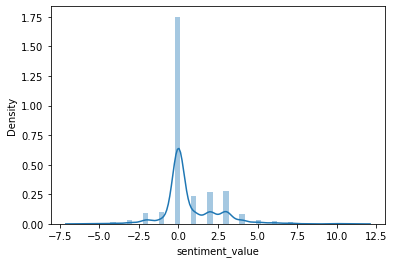

In [106]:
sns.distplot(emsa['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

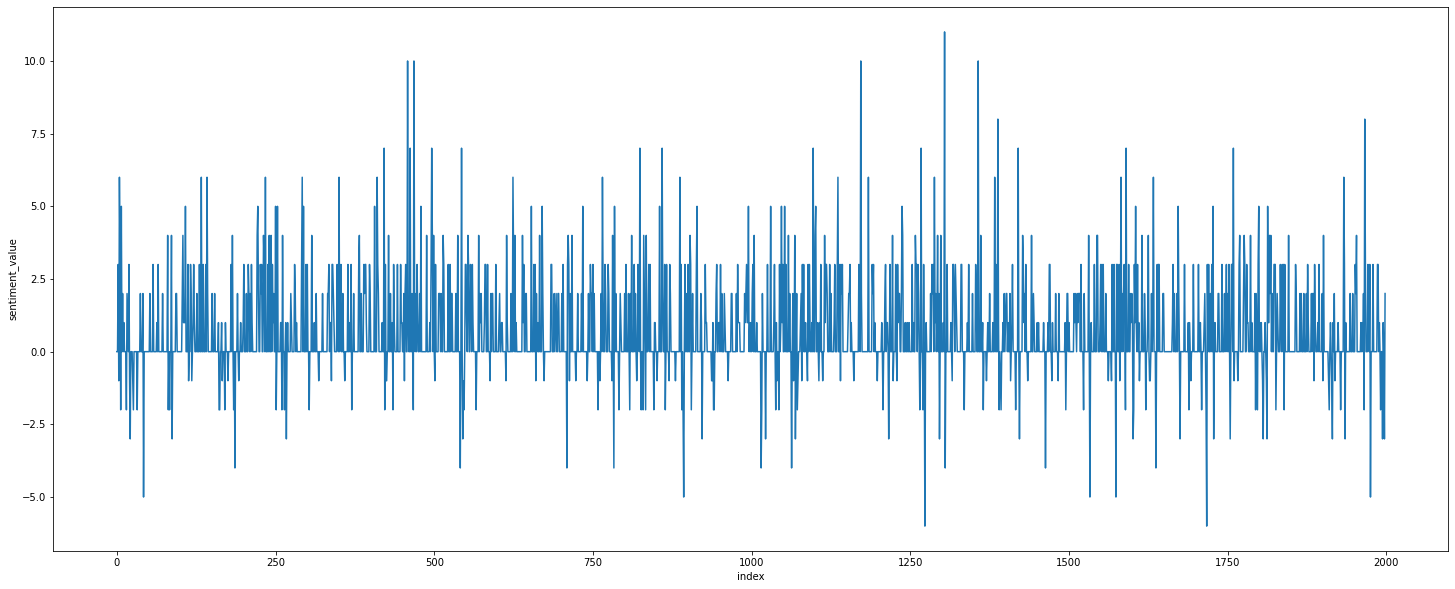

In [107]:
plt.figure(figsize=(25, 10))
sns.lineplot(y='sentiment_value',x='index',data=emsa)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

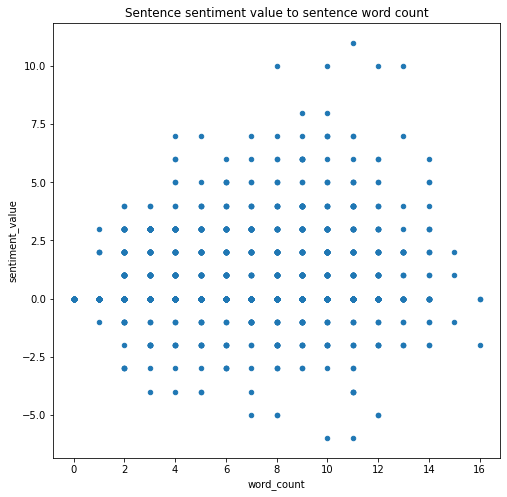

In [108]:
emsa.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# E-commerce Platform Review

# SamsungGalaxyS21Ultra

In [121]:
s=pd.read_csv('SamsungGalaxyS21Ultra_reviews.csv')

In [122]:
s

,userComments
0,good
1,No for that you have to spend $300 to buy a Ga...
2,"So no heart rate reader, no Sp02 reader... ?"
3,"So no heart rate reader, no Sp02 reader... ?"
4,"Abs123, 24 Jul 2021I bought Samsung ultra s21 ..."
...,...
344,Nice phone 👍 and the review says so.\n \r\nJus...
345,"AnonD-973296, 25 Jan 2021Brace yourselves... T..."
346,Samsung should be ashamed of themselves rippin...
347,"JDK a.k.a NOT JUNIOR, 25 Jan 2021Waiting for t..."


In [123]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userComments  349 non-null    object
dtypes: object(1)
memory usage: 2.9+ KB


In [124]:
s.describe()

,userComments
count,349
unique,346
top,"So no heart rate reader, no Sp02 reader... ?"
freq,2


# Data Cleaning

In [125]:
def clean_text(text):
    '''Make text lowercase , remove texts in squared brackects , remove punctuation and remove words containg numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\w*\d\w*','', text)
    text = re.sub("[0-9" "]+","", text)
    text = re.sub('[''""_]','', text)
    return text

In [126]:
clean = lambda x: clean_text(x)

In [127]:
s['userComments'] =s.userComments.apply(clean)

In [128]:
s

,userComments
0,good
1,no for that you have to spend to buy a galaxy...
2,so no heart rate reader no reader
3,so no heart rate reader no reader
4,jul bought samsung ultra days ago and sin...
...,...
344,nice phone 👍 and the review says so\n \r\njust...
345,jan yourselves they are cominghonestlyim su...
346,samsung should be ashamed of themselves rippin...
347,jdk aka not junior jan for the samsung hater...


In [129]:
comments =' '.join(s['userComments'])
comments

'good no for that you have to spend  to buy a galaxy watch d so no heart rate reader no  reader  so no heart rate reader no  reader    jul  bought samsung ultra   days ago and since day  its restarting on its own randomly stuc morecheck a place you bought it i bought samsung ultra   days ago and since day  its restarting on its own randomly stucks at android recovery  cause of recovery unknown plus forces you to reset your phone and doesnt starts until you reset and lose all your data😑😑  tried every hack troubleshooting everything nothing worked need help anyone  the always on display also works at   we expected this to be the place where wed see the promised  well it is not this could be a potential burninrelated setting though which mandates refreshing those pixels every now and then\n \r\nwhy would i want  from aod its only there to display notifications i dont even slightly care about having smoother scrolling i care a lot more about the content inside the app itself hrr screens on

In [130]:
no_punc_comments = comments.translate(str.maketrans('', '', string.punctuation))
no_punc_comments

'good no for that you have to spend  to buy a galaxy watch d so no heart rate reader no  reader  so no heart rate reader no  reader    jul  bought samsung ultra   days ago and since day  its restarting on its own randomly stuc morecheck a place you bought it i bought samsung ultra   days ago and since day  its restarting on its own randomly stucks at android recovery  cause of recovery unknown plus forces you to reset your phone and doesnt starts until you reset and lose all your data😑😑  tried every hack troubleshooting everything nothing worked need help anyone  the always on display also works at   we expected this to be the place where wed see the promised  well it is not this could be a potential burninrelated setting though which mandates refreshing those pixels every now and then\n \r\nwhy would i want  from aod its only there to display notifications i dont even slightly care about having smoother scrolling i care a lot more about the content inside the app itself hrr screens on

In [131]:
comments_tokens = word_tokenize(no_punc_comments)
print(comments_tokens[0:50])

['good', 'no', 'for', 'that', 'you', 'have', 'to', 'spend', 'to', 'buy', 'a', 'galaxy', 'watch', 'd', 'so', 'no', 'heart', 'rate', 'reader', 'no', 'reader', 'so', 'no', 'heart', 'rate', 'reader', 'no', 'reader', 'jul', 'bought', 'samsung', 'ultra', 'days', 'ago', 'and', 'since', 'day', 'its', 'restarting', 'on', 'its', 'own', 'randomly', 'stuc', 'morecheck', 'a', 'place', 'you', 'bought', 'it']


In [133]:
len(comments_tokens)

15345

In [134]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in comments_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['good', 'spend', 'buy', 'galaxy', 'watch', 'heart', 'rate', 'reader', 'reader', 'heart', 'rate', 'reader', 'reader', 'jul', 'bought', 'samsung', 'ultra', 'days', 'ago', 'since', 'day', 'restarting', 'randomly', 'stuc', 'morecheck', 'place', 'bought', 'bought', 'samsung', 'ultra', 'days', 'ago', 'since', 'day', 'restarting', 'randomly', 'stucks', 'android', 'recovery', 'cause']


In [135]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['good', 'spend', 'buy', 'galaxy', 'watch', 'heart', 'rate', 'reader', 'reader', 'heart', 'rate', 'reader', 'reader', 'jul', 'bought', 'samsung', 'ultra', 'days', 'ago', 'since', 'day', 'restarting', 'randomly', 'stuc', 'morecheck']


In [136]:
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['good', 'spend', 'buy', 'galaxi', 'watch', 'heart', 'rate', 'reader', 'reader', 'heart', 'rate', 'reader', 'reader', 'jul', 'bought', 'samsung', 'ultra', 'day', 'ago', 'sinc', 'day', 'restart', 'randomli', 'stuc', 'morecheck', 'place', 'bought', 'bought', 'samsung', 'ultra', 'day', 'ago', 'sinc', 'day', 'restart', 'randomli', 'stuck', 'android', 'recoveri', 'caus']


In [137]:
freq= pd.Series(' '.join(s['userComments']).split()).value_counts()[:50]
freq

the        789
and        357
to         330
a          293
is         292
i          241
it         211
in         196
of         189
you        157
that       147
with       144
on         134
samsung    132
for        132
jan        131
ultra      122
phone      116
but        112
this       108
have       107
its         95
not         93
are         90
be          89
as          79
or          78
at          77
they        76
camera      65
my          61
all         61
so          61
only        60
no          59
can         56
pro         56
if          56
than        55
one         54
about       54
from        54
like        53
was         53
has         53
exynos      52
more        52
even        51
better      51
me          50
dtype: int64

In [138]:
stop= stopwords.words('english')
s['userComments'] = s['userComments'].apply(lambda x:  " ".join(x for x in x.split() if x not in stop))

In [139]:
freqsw = pd.Series(' '.join(s['userComments']).split()).value_counts()[:30]
freqsw

samsung      132
jan          131
ultra        122
phone        116
camera        65
pro           56
one           54
like          53
exynos        52
even          51
better        51
dont          50
battery       48
anonymous     43
iphone        41
really        40
charger       39
charging      36
phones        36
still         35
buy           33
see           33
use           33
much          32
review        32
best          31
version       31
also          31
feb           31
people        30
dtype: int64

In [140]:
s['userComments']

0                                                   good
1                                 spend buy galaxy watch
2                               heart rate reader reader
3                               heart rate reader reader
4      jul bought samsung ultra days ago since day re...
                             ...                        
344               nice phone 👍 review says regular quite
345    jan cominghonestlyim surprised gsmarena verdic...
346    samsung ashamed ripping customers useless offe...
347    jdk aka junior jan samsung haters come swarmbr...
348                    waiting samsung haters come swarm
Name: userComments, Length: 349, dtype: object

# Feature Extraction

In [142]:
vectorizer = CountVectorizer(min_df=1,max_df=0.9)
x = vectorizer.fit_transform(s['userComments'])

WF1 = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences' :np.asarray(x.sum(axis=0)).ravel().tolist()})
WF1['frequency'] = WF['occurrences']/np.sum(WF['occurrences'])

In [143]:
WF1

,term,occurrences,frequency
0,ability,1,0.000116
1,able,4,0.000465
2,abougt,1,0.000116
3,absolutely,2,0.000233
4,access,1,0.000116
...,...,...,...
2347,zippy,1,0.000116
2348,zoki,1,0.000116
2349,zollyzo,1,0.000116
2350,zoom,11,0.001280


# bigrams and trigrams

In [144]:
def get_top_n2_words(corpus, n=None):
    vec1=CountVectorizer(ngram_range=(2,2), 
          max_features=2000).fit(corpus)               
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in
               vec1.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1],
            reverse=True)
    return words_freq[:n]

In [145]:
top2_words=get_top_n2_words(s['userComments'],n=200) 
top2_df=pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]
top2_df.head()

,Bi-gram,Freq
0,anonymous jan,32
1,battery life,18
2,samsung ultra,16
3,sd card,16
4,low light,16


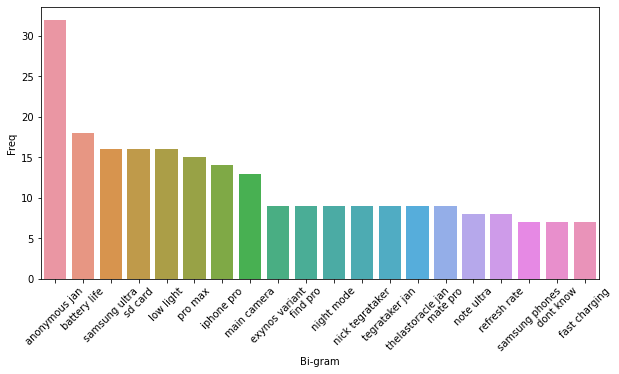

In [146]:
top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"]);

In [147]:
def get_top_n3_words(corpus, n=None):
    vec1=CountVectorizer(ngram_range=(3,3),
          max_features=2000).fit(corpus)               
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in
               vec1.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1],
            reverse=True)
    return words_freq[:n]

In [148]:
top3_words=get_top_n3_words(s['userComments'],n=200) 
top3_df=pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram","Freq"]
top3_df.head()

,Tri-gram,Freq
0,iphone pro max,13
1,nick tegrataker jan,9
2,oppo find pro,6
3,anonymous jan main,6
4,jan main camera,6


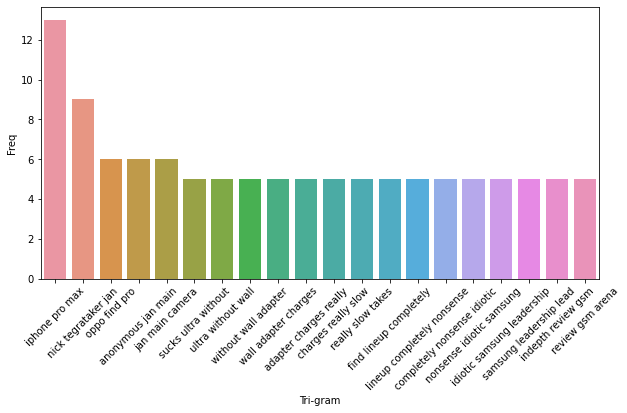

In [149]:
top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot1=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot1.set_xticklabels(rotation=45,labels=top20_trigram["Tri-gram"]);

# TFidf vectorizer

In [151]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)
doc_vec=vectorizer.fit_transform(s['userComments'])
names_features=vectorizer.get_feature_names()
dense=doc_vec.todense()
denselist=dense.tolist()
df1=pd.DataFrame(denselist,columns=names_features)

In [152]:
df1

,able,accessories,achieve,actual,actually,ad,adapter,adaptive,add,added,...,wrote,xiaomi,year,years,yes,youre,ypcx,zero,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Wordcloud

In [156]:
string_Total=" ".join(s['userComments'])

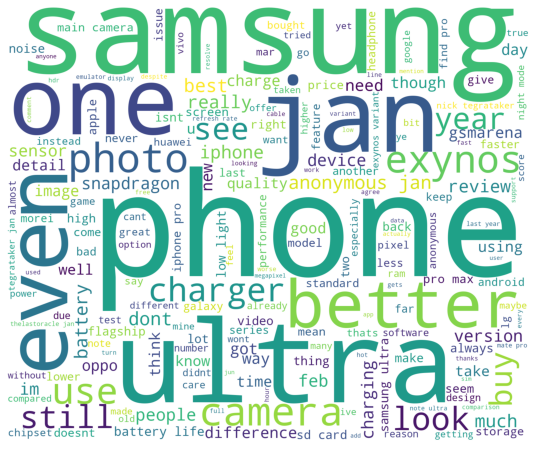

In [157]:
wordcloud_stw=WordCloud(
              background_color='white',
              width=1800,
              height=1500
              ).generate(string_Total)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_stw)

# Emotion Mining

In [158]:
emsa1=s.copy()

In [159]:
emsa1

,userComments
0,good
1,spend buy galaxy watch
2,heart rate reader reader
3,heart rate reader reader
4,jul bought samsung ultra days ago since day re...
...,...
344,nice phone 👍 review says regular quite
345,jan cominghonestlyim surprised gsmarena verdic...
346,samsung ashamed ripping customers useless offe...
347,jdk aka junior jan samsung haters come swarmbr...


In [160]:
emsa1['userComments']=emsa1['userComments'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
emsa.head()

,Text,sentiment_value,word_count,index
0,alien,0,1,0
1,idaacarmack tracing cyberpunk nextlevel tried,0,5,1
2,joerogan spotify great interview,3,4,2
3,doge underestimated,-1,2,3
4,teslacn congratulations tesla china amazing ex...,6,10,4


In [161]:
emsa1['sentiment_value'] = emsa1['userComments'].apply(calculate_sentiment)
emsa1

,userComments,sentiment_value
0,good,3
1,spend galaxy watch,0
2,heart rate reader reader,0
3,heart rate reader reader,0
4,bought samsung ultra days since restarting ran...,0
...,...,...
344,nice phone review says regular quite,3
345,cominghonestlyim surprised gsmarena verdict ex...,1
346,samsung ashamed ripping customers useless offe...,-18
347,junior samsung haters come swarmbrace coming,0


In [162]:
emsa1['word_count'] = emsa1['userComments'].str.split().apply(len)
emsa1['word_count'].head(10)

0     1
1     3
2     4
3     4
4    11
5    32
6    37
7     5
8    19
9    47
Name: word_count, dtype: int64

In [163]:
emsa1['sentiment_value'].describe()

count    349.000000
mean       1.025788
std        3.859891
min      -18.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       14.000000
Name: sentiment_value, dtype: float64

In [164]:
emsa1[emsa1['sentiment_value']<=0].shape

(182, 3)

In [165]:
emsa1[emsa1['sentiment_value']>=11].head()

,userComments,sentiment_value,word_count
193,nick tegrataker seems suffer ringing artifacts...,11,71
252,nick tegrataker ultras display goes brighter u...,14,36
254,hurm change mind ultra camera upon detail revi...,12,32
257,thanks indepth review arena team want update s...,12,55
322,congrats ones still phone matter since wont do...,13,93


In [166]:
emsa1['index']=range(0,len(emsa1))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

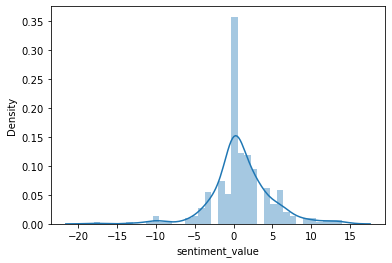

In [167]:
sns.distplot(emsa1['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

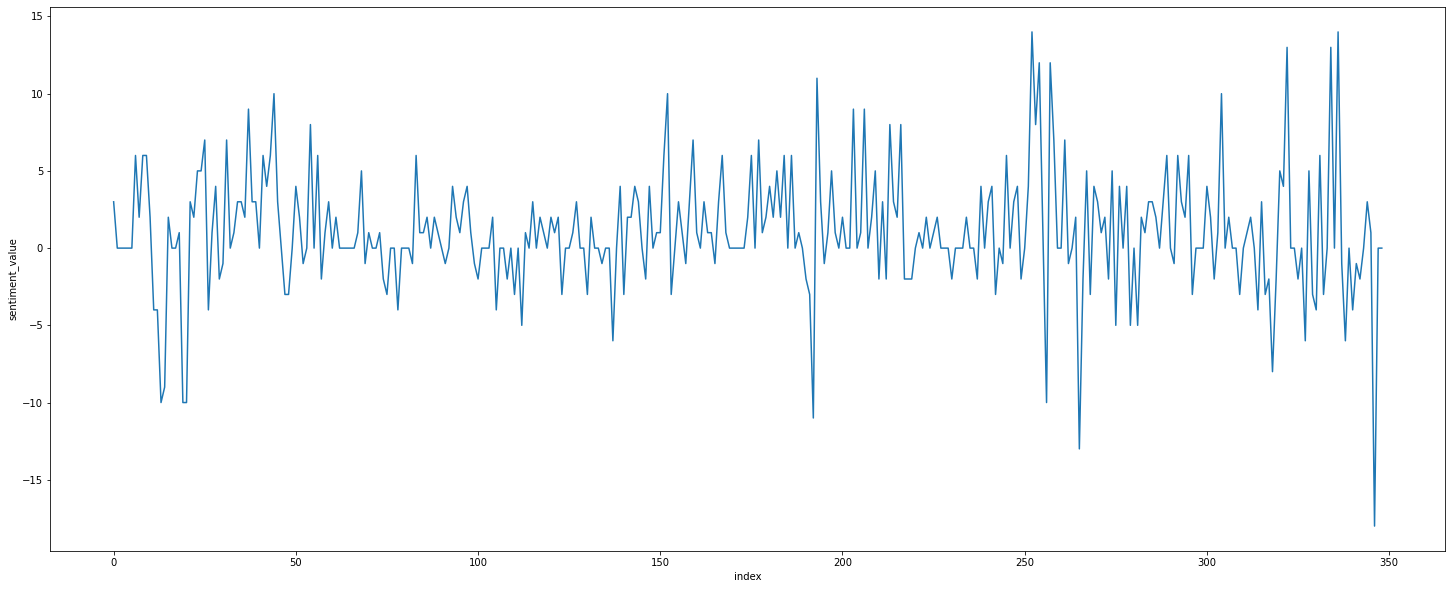

In [168]:
plt.figure(figsize=(25, 10))
sns.lineplot(y='sentiment_value',x='index',data=emsa1)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

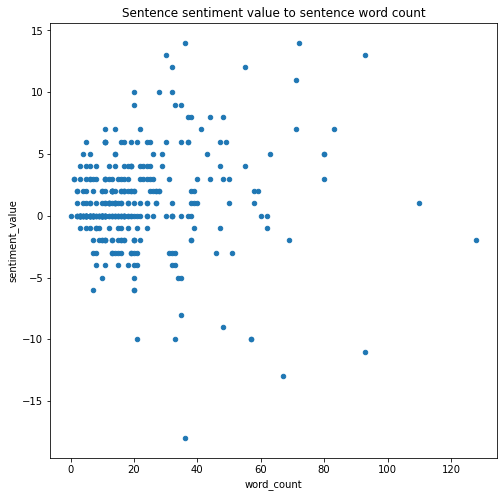

In [169]:
emsa1.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')